<a href="https://colab.research.google.com/github/jitendra-121/100-days-of-machine-learning/blob/main/new(d).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert the labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 2. Define CNN model architecture with Kolmogorov-Arnold Neural Network layers and Batch Normalization



# Apply early stopping to prevent overfitting


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
model = models.Sequential()

# Layer 1: Convolutional layer with 32 filters, 3x3 kernel size, ReLU activation, He initialization
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                        kernel_initializer=initializers.HeNormal(), input_shape=(32, 32, 3)))

# Batch Normalization after the convolutional layer
model.add(layers.BatchNormalization())

# Layer 2: Convolutional layer with 32 filters, 3x3 kernel size, He initialization
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                        kernel_initializer=initializers.HeNormal()))

# Batch Normalization
model.add(layers.BatchNormalization())

# MaxPooling layer with 2x2 pool size
model.add(layers.MaxPooling2D((2, 2)))

# Dropout to prevent overfitting
model.add(layers.Dropout(0.25))

# Layer 3: Convolutional layer with 64 filters, 3x3 kernel size, He initialization
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                        kernel_initializer=initializers.HeNormal()))

# Batch Normalization
model.add(layers.BatchNormalization())

# Layer 4: Convolutional layer with 64 filters, 3x3 kernel size, He initialization
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                        kernel_initializer=initializers.HeNormal()))

# Batch Normalization
model.add(layers.BatchNormalization())

# MaxPooling layer with 2x2 pool size
model.add(layers.MaxPooling2D((2, 2)))

# Dropout to prevent overfitting
model.add(layers.Dropout(0.25))

# Flatten the output from the convolutional layers
model.add(layers.Flatten())

# KAN-like layers: Multiple smaller hidden layers simulating 1D functions
# 3 hidden layers of 128 units with ReLU activation, He initialization, and L2 regularization
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001),
                       kernel_initializer=initializers.HeNormal()))
model.add(layers.BatchNormalization())

model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001),
                       kernel_initializer=initializers.HeNormal()))
model.add(layers.BatchNormalization())

model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001),
                       kernel_initializer=initializers.HeNormal()))
model.add(layers.BatchNormalization())

# Final output layer with 10 units for 10 classes (softmax)
model.add(layers.Dense(10, activation='softmax', kernel_initializer=initializers.GlorotUniform()))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,158,762 (4.42 MB)

 Trainable params: 1,157,482 (4.42 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [ ]:
# 3. Compile the model with learning rate schedule
initial_lr = 0.001
optimizer = optimizers.Adam(learning_rate=initial_lr)

# Learning rate schedule: Reduce LR on plateau
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Data augmentation to avoid overfitting
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

# Fit the data generator on the training data
datagen.fit(x_train)

# 5. Train the model with augmented data
batch_size = 64
epochs = 100

In [ ]:
from keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Combine callbacks
callbacks = [early_stopping, lr_schedule,mc]

history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks)

# 6. Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Summary of the model
model.summary()

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3990 - loss: 2.5649
Epoch 1: val_accuracy improved from -inf to 0.55940, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 63ms/step - accuracy: 0.3993 - loss: 2.5636 - val_accuracy: 0.5594 - val_loss: 1.8509 - learning_rate: 0.0010
Epoch 2/100
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5865 - loss: 1.6969
Epoch 2: val_accuracy improved from 0.55940 to 0.58240, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.5865 - loss: 1.6966 - val_accuracy: 0.5824 - val_loss: 1.6122 - learning_rate: 0.0010
Epoch 3/100
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6381 - loss: 1.4051
Epoch 3: val_accuracy improved from 0.58240 to 0.61580, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.6382 - loss: 1.4050 - val_accuracy: 0.6158 - val_loss: 1.5045 - learning_rate: 0.0010
Epoch 4/100
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step -

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,473,728 (13.25 MB)

 Trainable params: 1,157,482 (4.42 MB)

 Non-trainable params: 1,280 (5.00 KB)

 Optimizer params: 2,314,966 (8.83 MB)

In [ ]:
y_pred=model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1),y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1000
           1       0.92      0.94      0.93      1000
           2       0.85      0.80      0.83      1000
           3       0.80      0.68      0.73      1000
           4       0.83      0.84      0.84      1000
           5       0.86      0.72      0.78      1000
           6       0.74      0.97      0.84      1000
           7       0.90      0.89      0.90      1000
           8       0.91      0.93      0.92      1000
           9       0.89      0.94      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



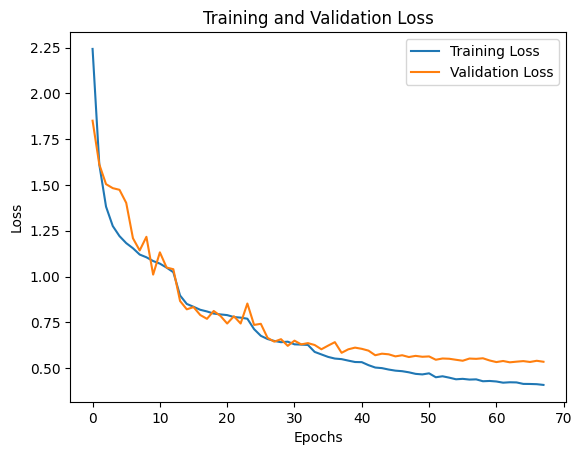

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add title and labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add legend
plt.legend()

# Display the plot
plt.show()

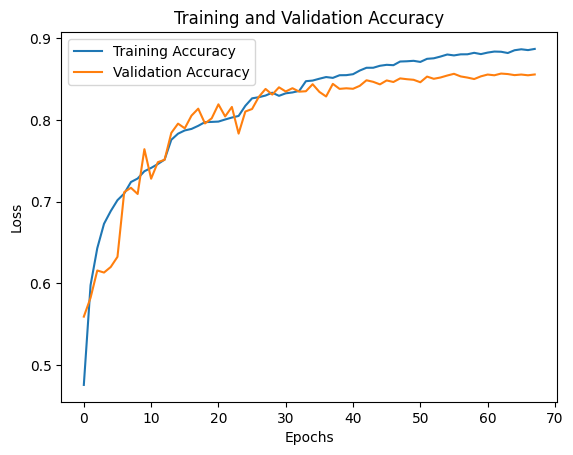

In [ ]:


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

In [ ]:
# load the saved model
from keras.models import load_model
saved_model = load_model('best_model.keras')

In [ ]:
y_pred2=saved_model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
print(classification_report(y_test.argmax(axis=1),y_pred2.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1000
           1       0.92      0.94      0.93      1000
           2       0.85      0.80      0.83      1000
           3       0.80      0.68      0.73      1000
           4       0.83      0.84      0.84      1000
           5       0.86      0.72      0.78      1000
           6       0.74      0.97      0.84      1000
           7       0.90      0.89      0.90      1000
           8       0.91      0.93      0.92      1000
           9       0.89      0.94      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
print(saved_model.evaluate(x_train, y_train))
print(saved_model.evaluate(x_test, y_test))

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9256 - loss: 0.3025
[0.3049282133579254, 0.9253000020980835]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8584 - loss: 0.5315
[0.5318142175674438, 0.8565000295639038]


In [ ]:
#prining confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cn=confusion_matrix(y_test.argmax(axis=1),y_pred2.argmax(axis=1))

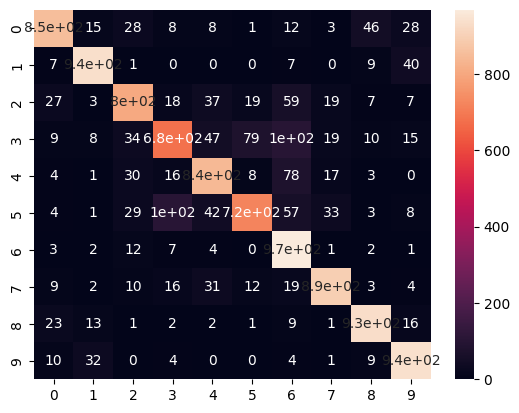

In [ ]:
#displaying confusion matrix
sns.heatmap(cn,annot=True)
plt.show()

In [ ]:
print(cn)

[[851  15  28   8   8   1  12   3  46  28]
 [  7 936   1   0   0   0   7   0   9  40]
 [ 27   3 804  18  37  19  59  19   7   7]
 [  9   8  34 677  47  79 102  19  10  15]
 [  4   1  30  16 843   8  78  17   3   0]
 [  4   1  29 103  42 720  57  33   3   8]
 [  3   2  12   7   4   0 968   1   2   1]
 [  9   2  10  16  31  12  19 894   3   4]
 [ 23  13   1   2   2   1   9   1 932  16]
 [ 10  32   0   4   0   0   4   1   9 940]]
